In [47]:
import numpy as np
import pandas as pd
from pathlib import Path
import sys
from statannot.statannot import add_stat_annotation

import matplotlib.pyplot as plt
import seaborn as sbn

dir_path = '/home/nnieto/Nico/Harmonization/harmonize_project/3_check_results/'
__file__ = dir_path+'plot_NM.py'
to_append = Path(__file__).resolve().parent.parent.as_posix()
sys.path.append(to_append)

from lib.utils import extract_experiment_data # noqa
from lib.utils import table_generation # noqa

Text(0.5, 1.0, 'Method: None')

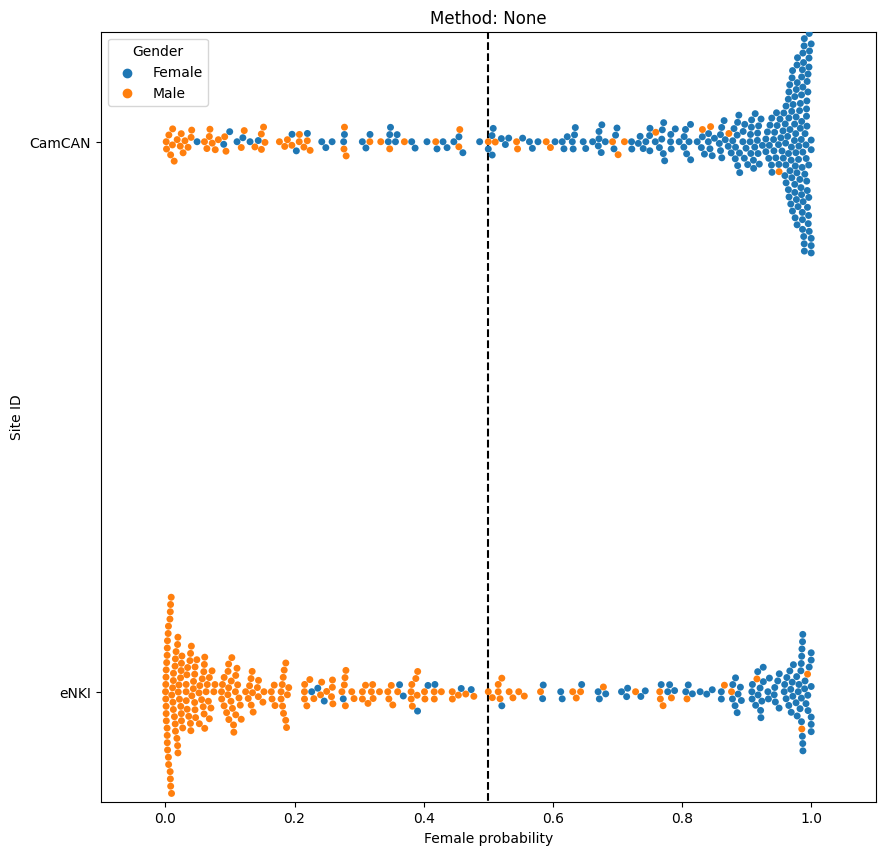

In [50]:
data_dir = "/home/nnieto/Nico/Harmonization/results_classification/test_classification_separated_genders_logit_stack_gssvm_pred_5repetitions/"

resutls = pd.read_csv(data_dir + "cheat_fold_0_of_5_out.csv",
                      sep=";")

resutls.rename(columns={"y_true": "Gender", "y_pred": "Female probability",
                        "site": "Site ID"},
               inplace=True)
resutls["Gender"].replace({0: "Male", 1: "Female"},
                          inplace=True)

fig, ax = plt.subplots(1, 1, figsize=[10, 10])
sbn.swarmplot(data=resutls, y="Site ID", x="Female probability", hue="Gender",
              ax=ax)
plt.xlim([-0.1,1.1])
plt.ylim([-0.2,1.2])

ax.vlines(x=0.5, ymin=-0.5, ymax=1.5, colors="black", linestyles="dashed")
plt.title("Method: None")

In [51]:
camcam= pd.read_csv("/home/nnieto/Nico/Harmonization/data/final_data_split/Y_CamCAN_gender_imbalance.csv")
enki = pd.read_csv("/home/nnieto/Nico/Harmonization/data/final_data_split/Y_eNKI_gender_imbalance.csv")

camcam

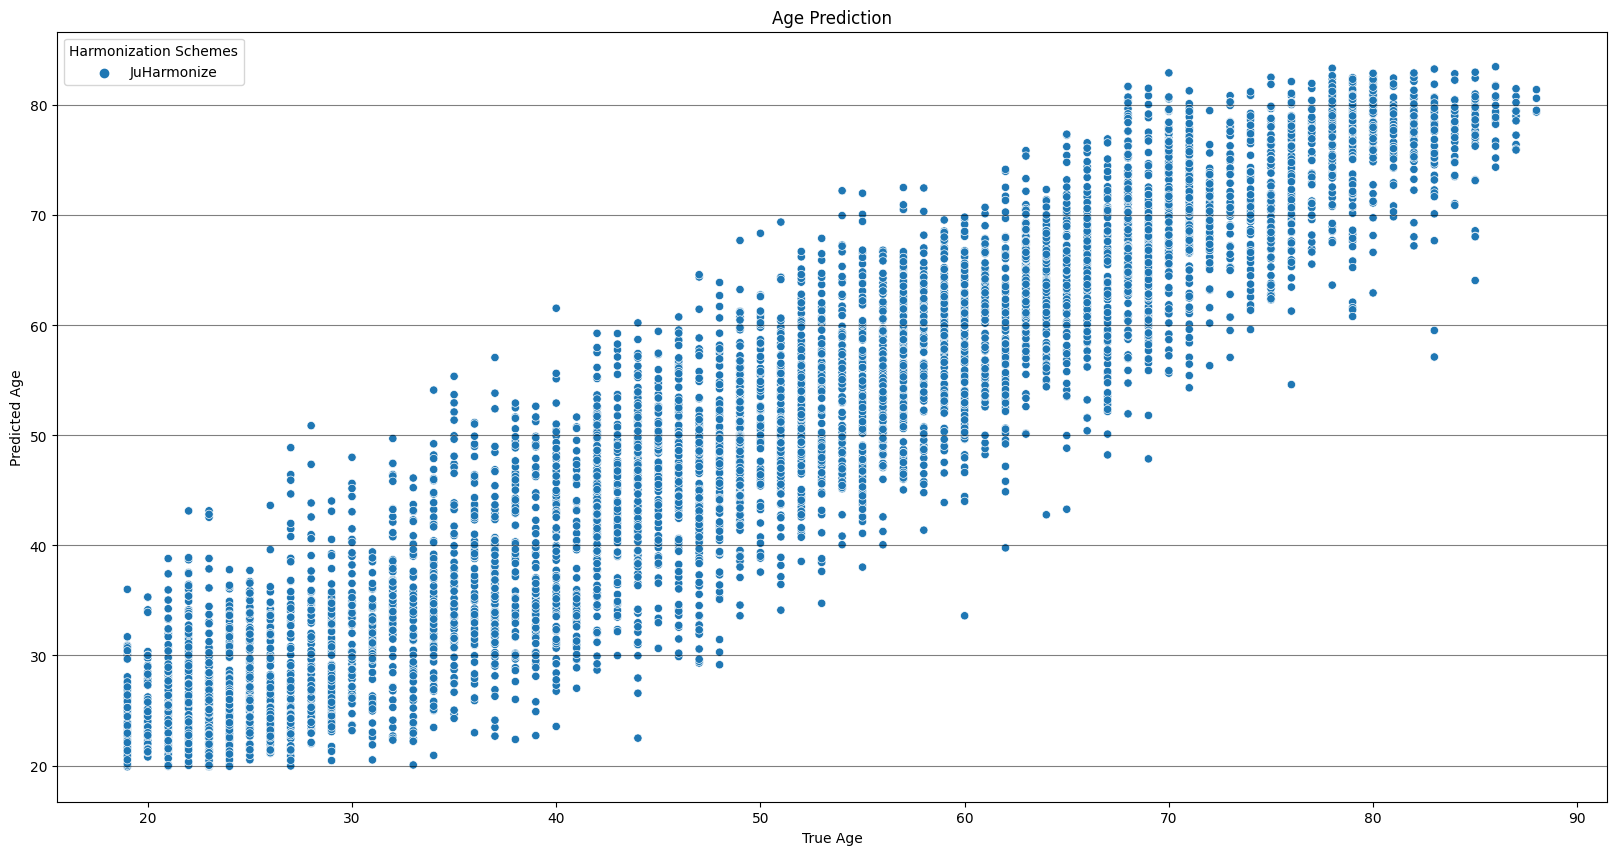

In [3]:
exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {'test_regression_multiples_pipelines_rf_stack_rvr_pred_CamCAN_CAT_eNKI_FSL'}
data = extract_experiment_data(exp_dir, experiments_to_check, train_acc=True)
data.rename(columns={"harmonize_mode": "Harmonization Schemes"},
            inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                       "target": "Leakage",
                                       "none": "None",
                                       "cheat": "Cheat",
                                       "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]
data = data[data["Harmonization Schemes"].isin(harm_modes)]
absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]

fig, ax = plt.subplots(1, 1, figsize=[20, 10])
pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)

harm_to_plot = 'JuHarmonize'

data_to_plot = data[data["Harmonization Schemes"] == harm_to_plot]

sbn.scatterplot(
    data=data_to_plot,
    x="y_true", y="y_pred", hue="Harmonization Schemes",
)
plt.ylabel("Predicted Age")
plt.title("Age Prediction")
plt.xlabel("True Age")
plt.grid(alpha=0.5, axis="y", c="black")
plt.show()





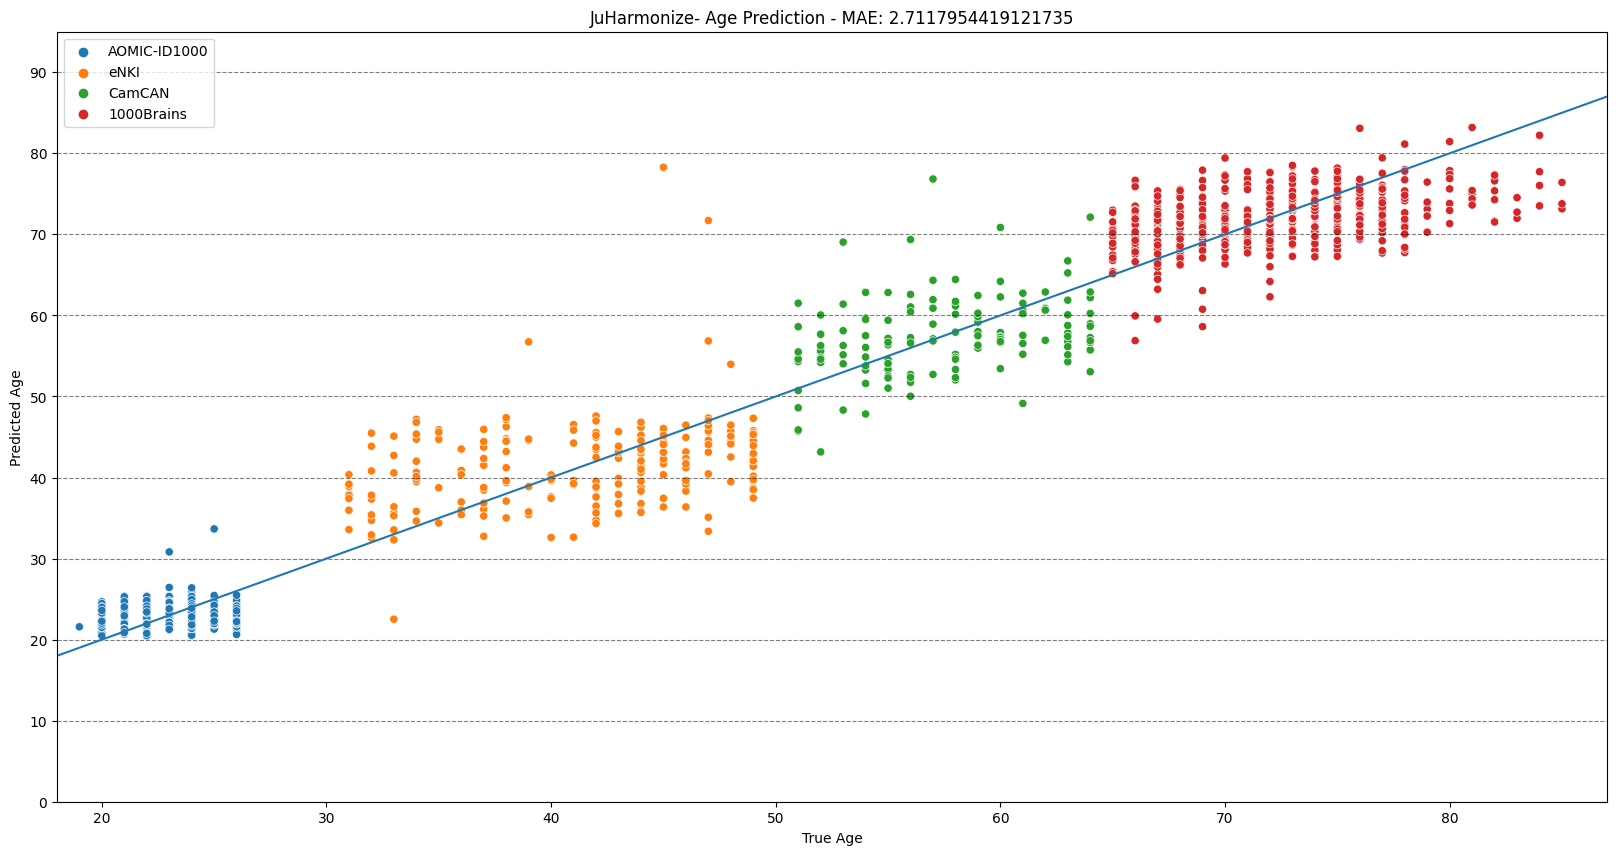

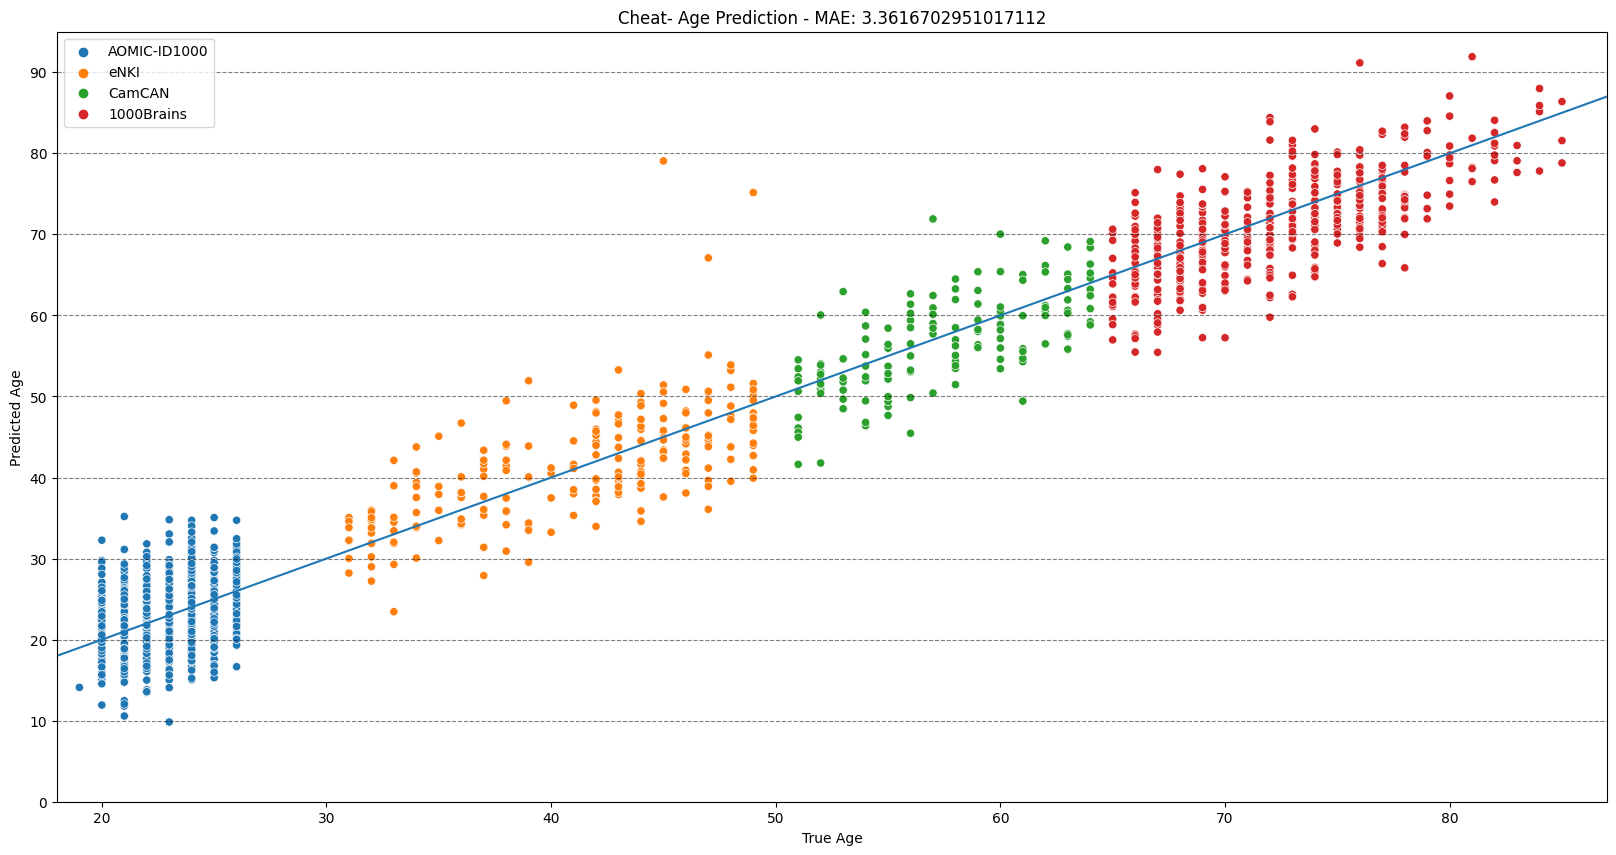

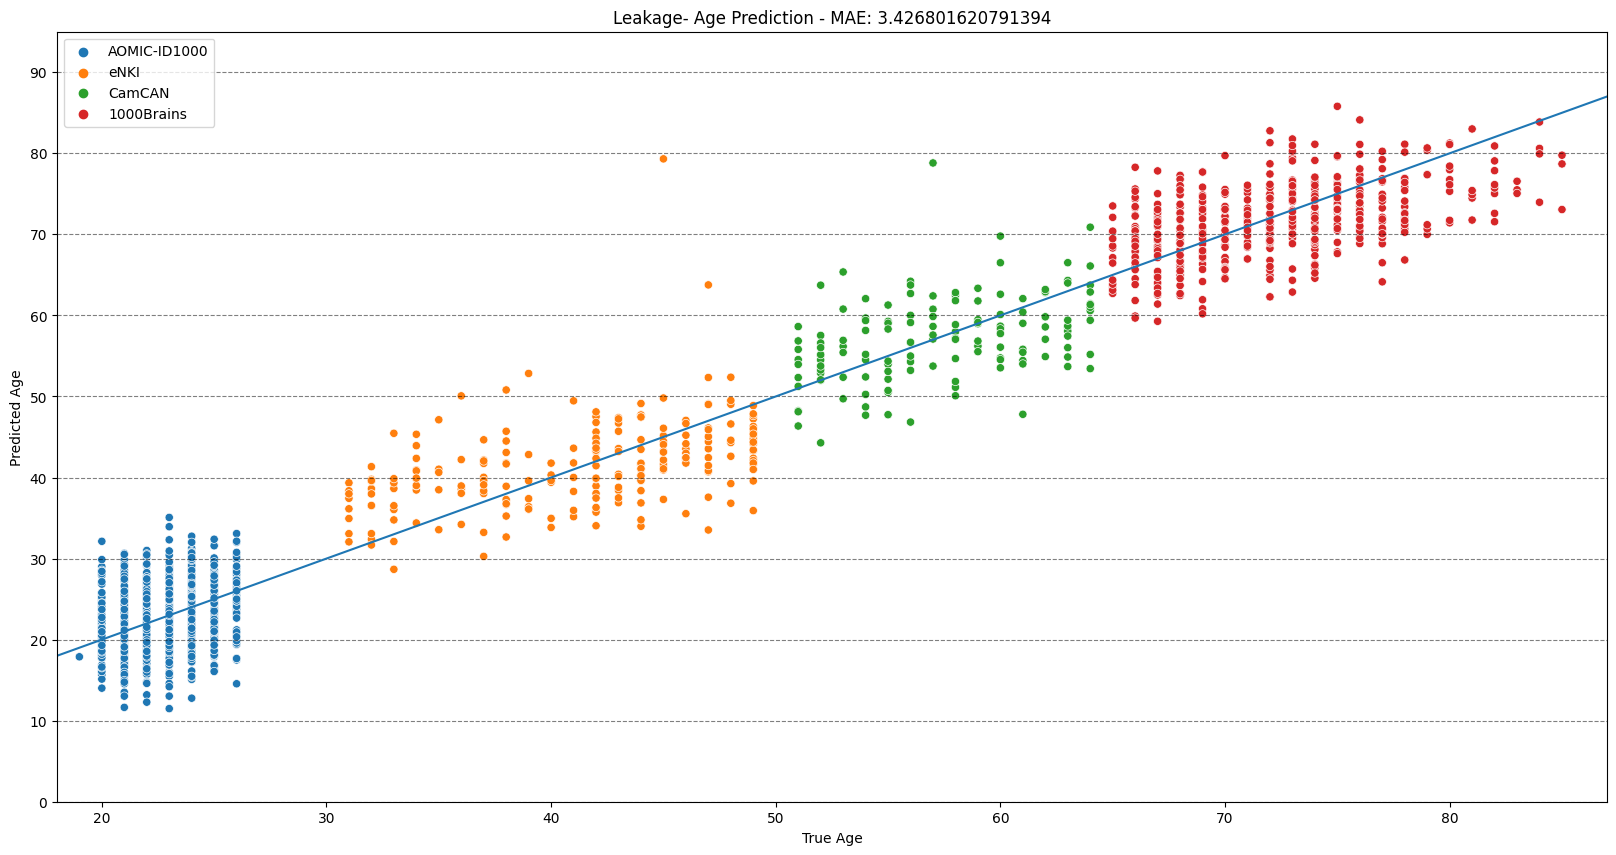

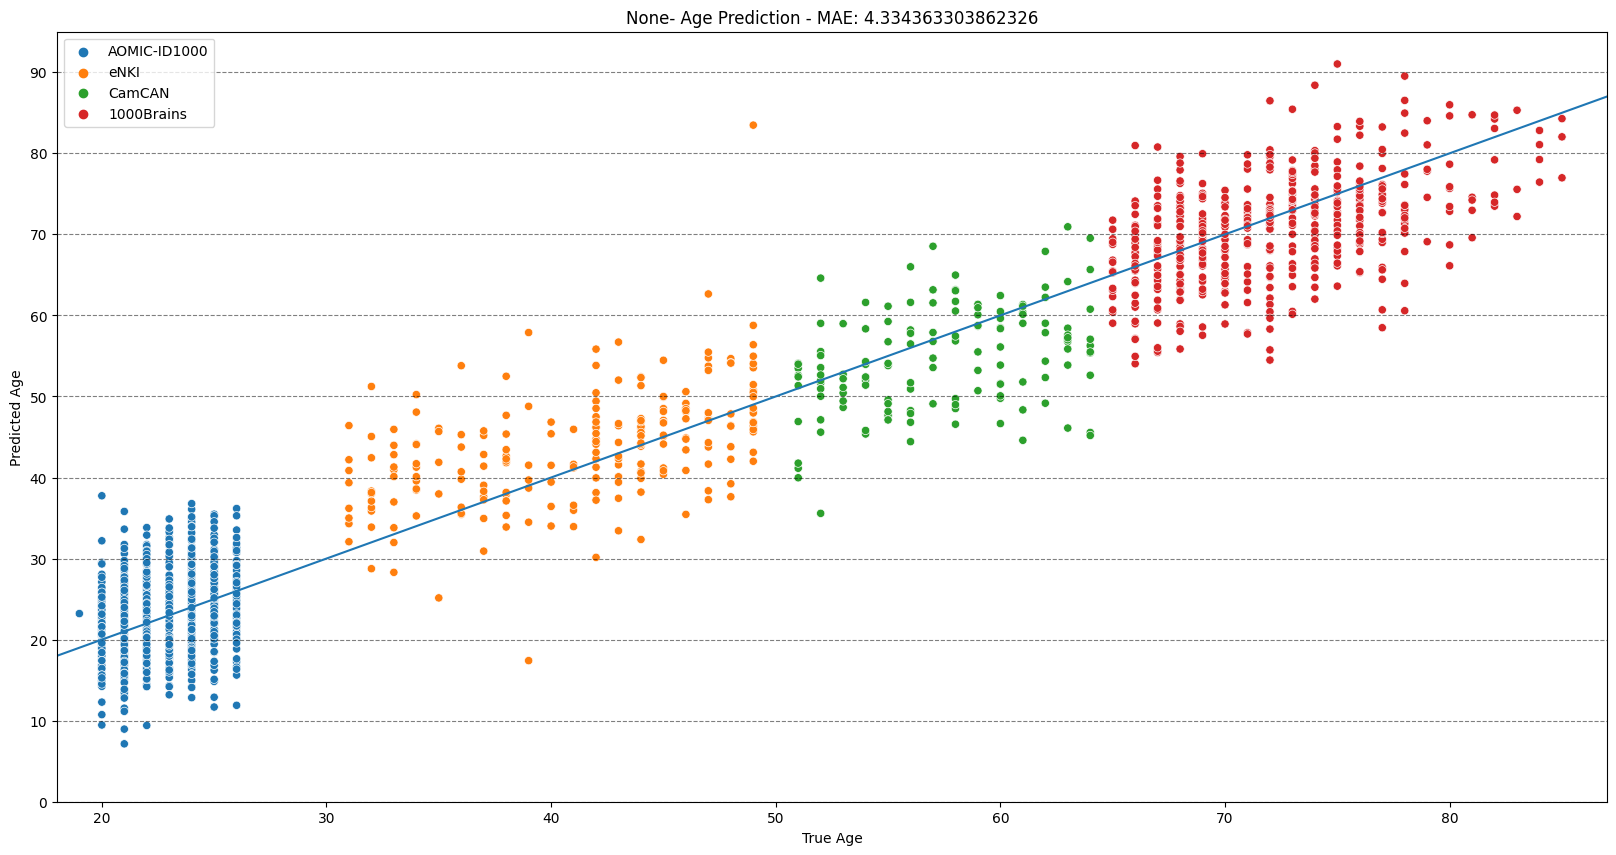

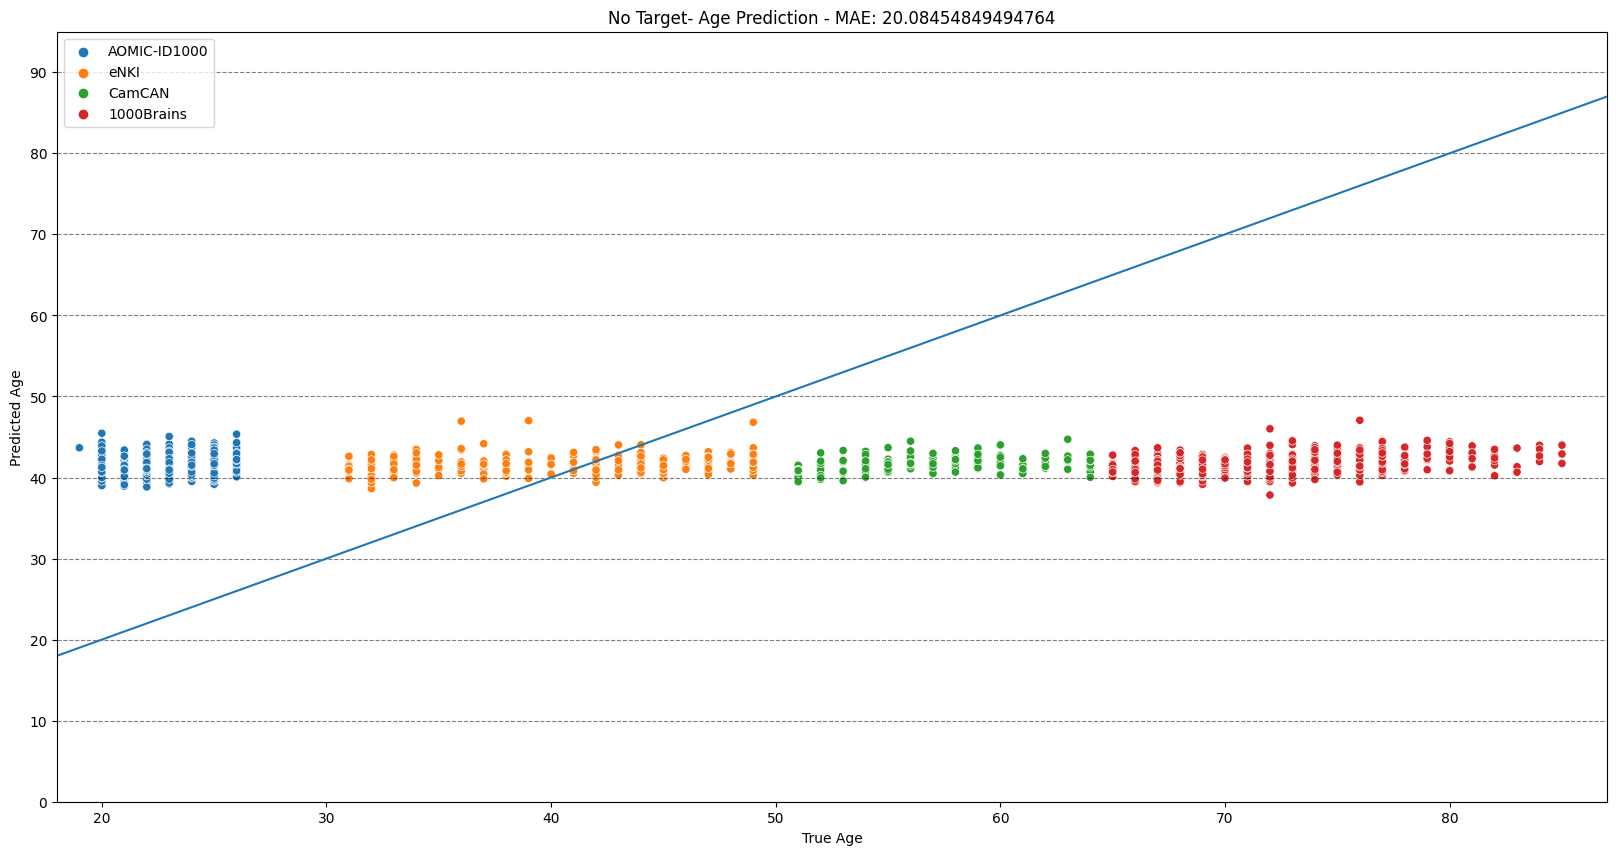

In [46]:

exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {
    'test_regression_separated_ages__rf_stack_rvr_pred'
}
data = extract_experiment_data(exp_dir, experiments_to_check)
data["site"].replace({"1000Gehirne": "1000Brains",
                      "ID1000": "AOMIC-ID1000"}, inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                "target": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "predict": "NeuroHarmony",
                                "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]


hue_order = ['AOMIC-ID1000', 'eNKI', 'CamCAN', '1000Brains',]
for harm_to_plot in harm_modes:
    data_to_plot = data[data["Harmonization Schemes"] == harm_to_plot]
    fig, ax = plt.subplots(1, 1, figsize=[20, 10])
    pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)
    sbn.scatterplot(
        data=data_to_plot,
        x="y_true", y="y_pred", hue="site", hue_order=hue_order
    )
    plt.ylabel("Predicted Age")
    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(data_to_plot["y_true"],data_to_plot["y_pred"])
    plt.title(harm_to_plot + "- Age Prediction - MAE: " + str(MAE))
    plt.xlabel("True Age")
    age_range_y = [0,95]
    grid_distance = 10
    plt.yticks(np.arange(age_range_y[0], age_range_y[1], grid_distance))
    plt.grid(alpha=0.5, which="both", axis="y", c="black", linestyle="--")
    plt.legend([],framealpha=0)
    age_range = [18,87]
    plt.xlim(age_range)

    plt.ylim(age_range_y)
    sbn.lineplot(x=age_range, y=age_range)
    plt.show()





In [38]:
data["site"].unique()

array(['eNKI', 'CamCAN', '1000Brains', 'AOMIC-ID1000'], dtype=object)

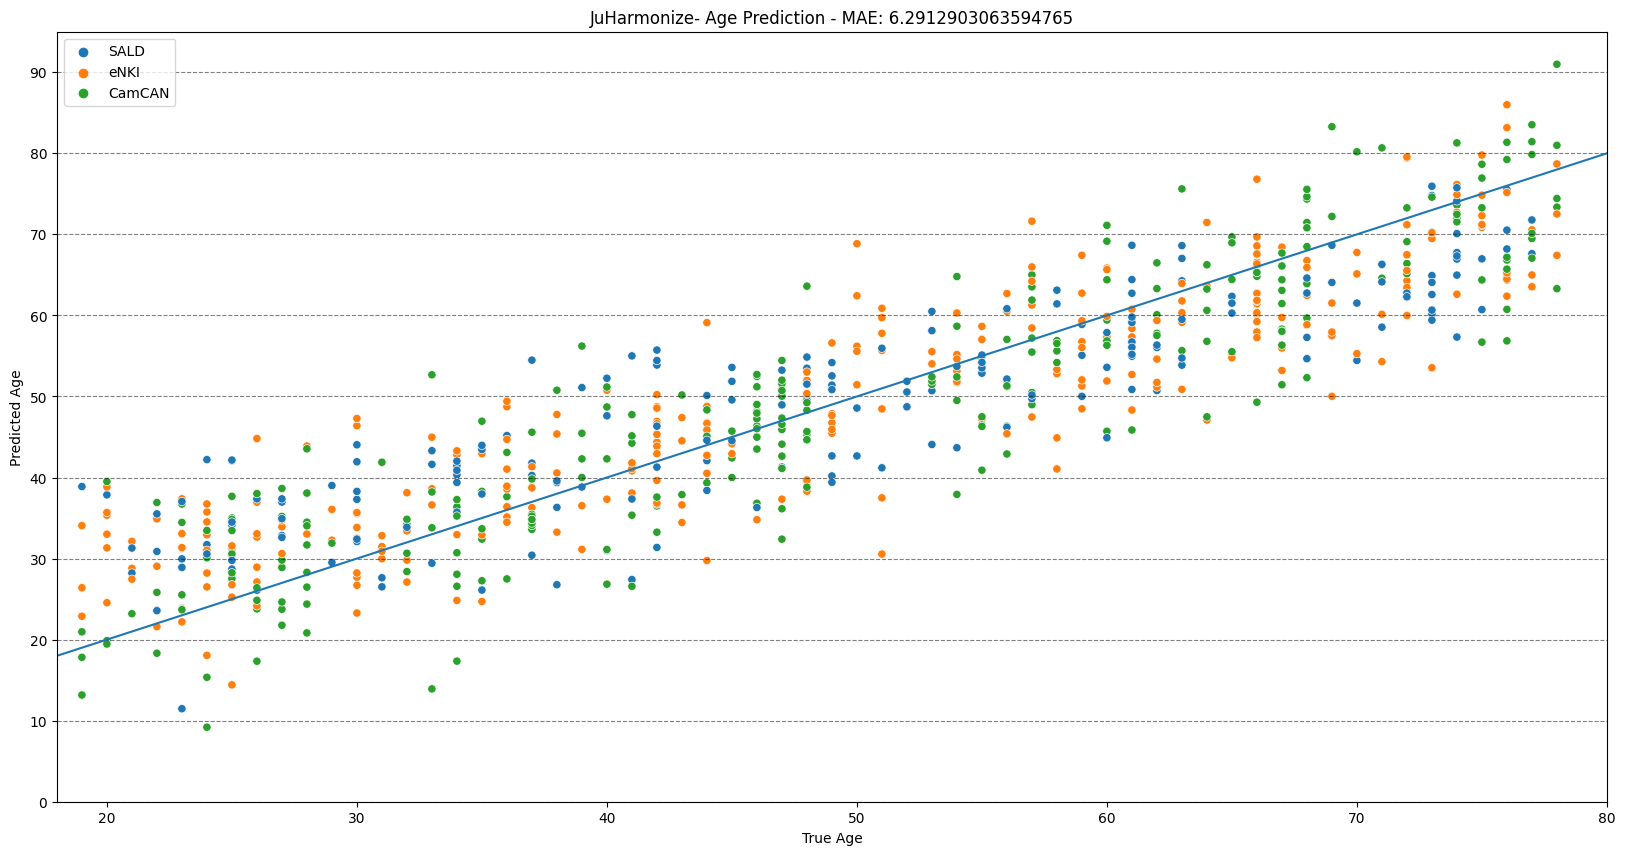

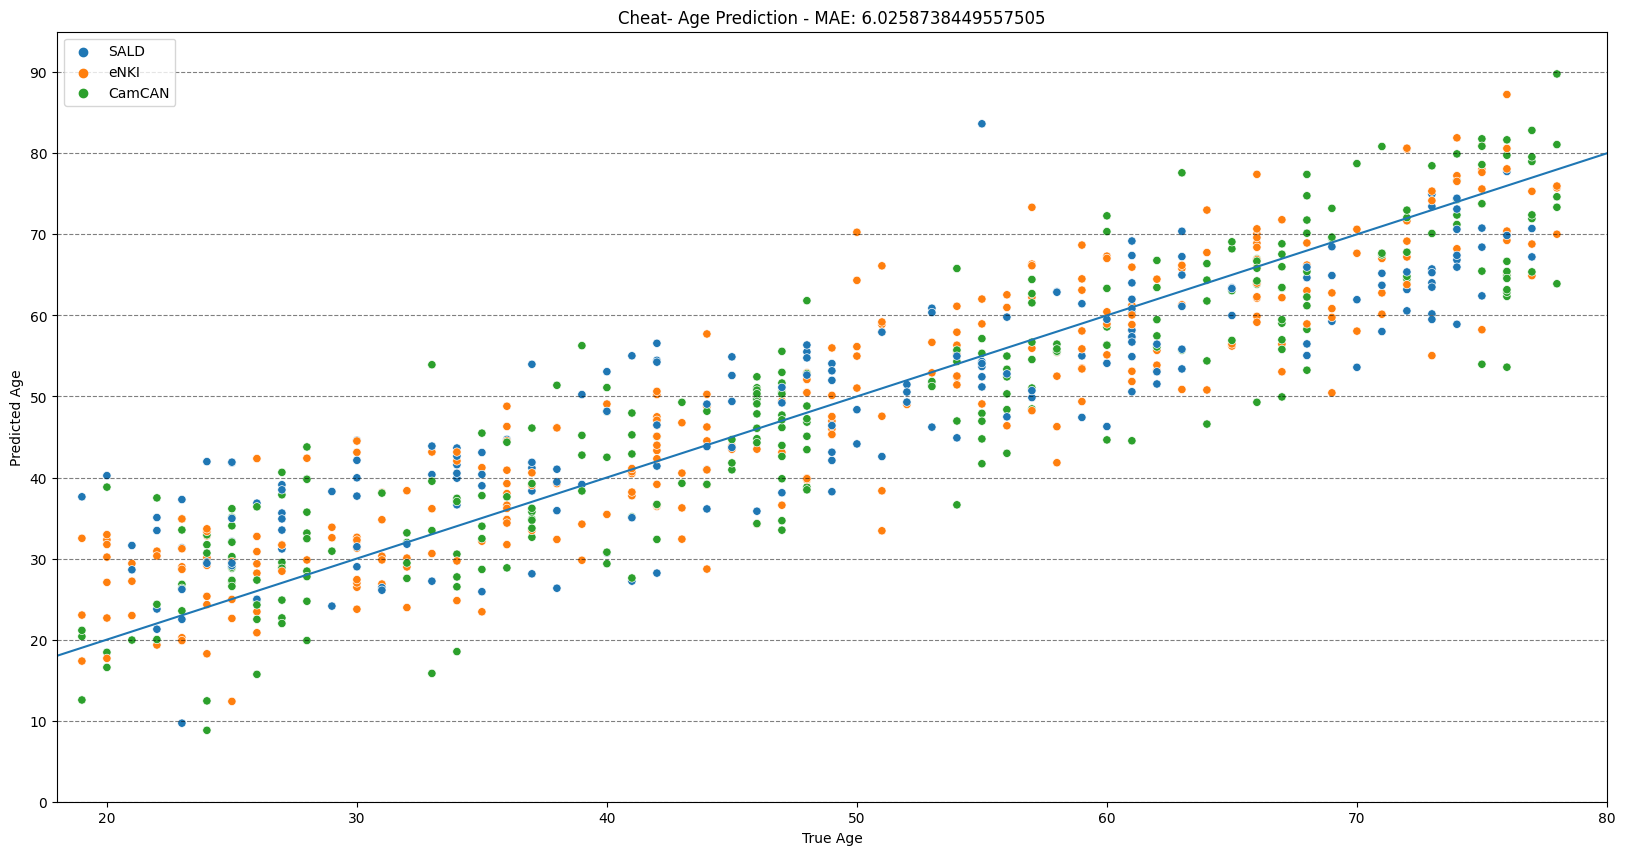

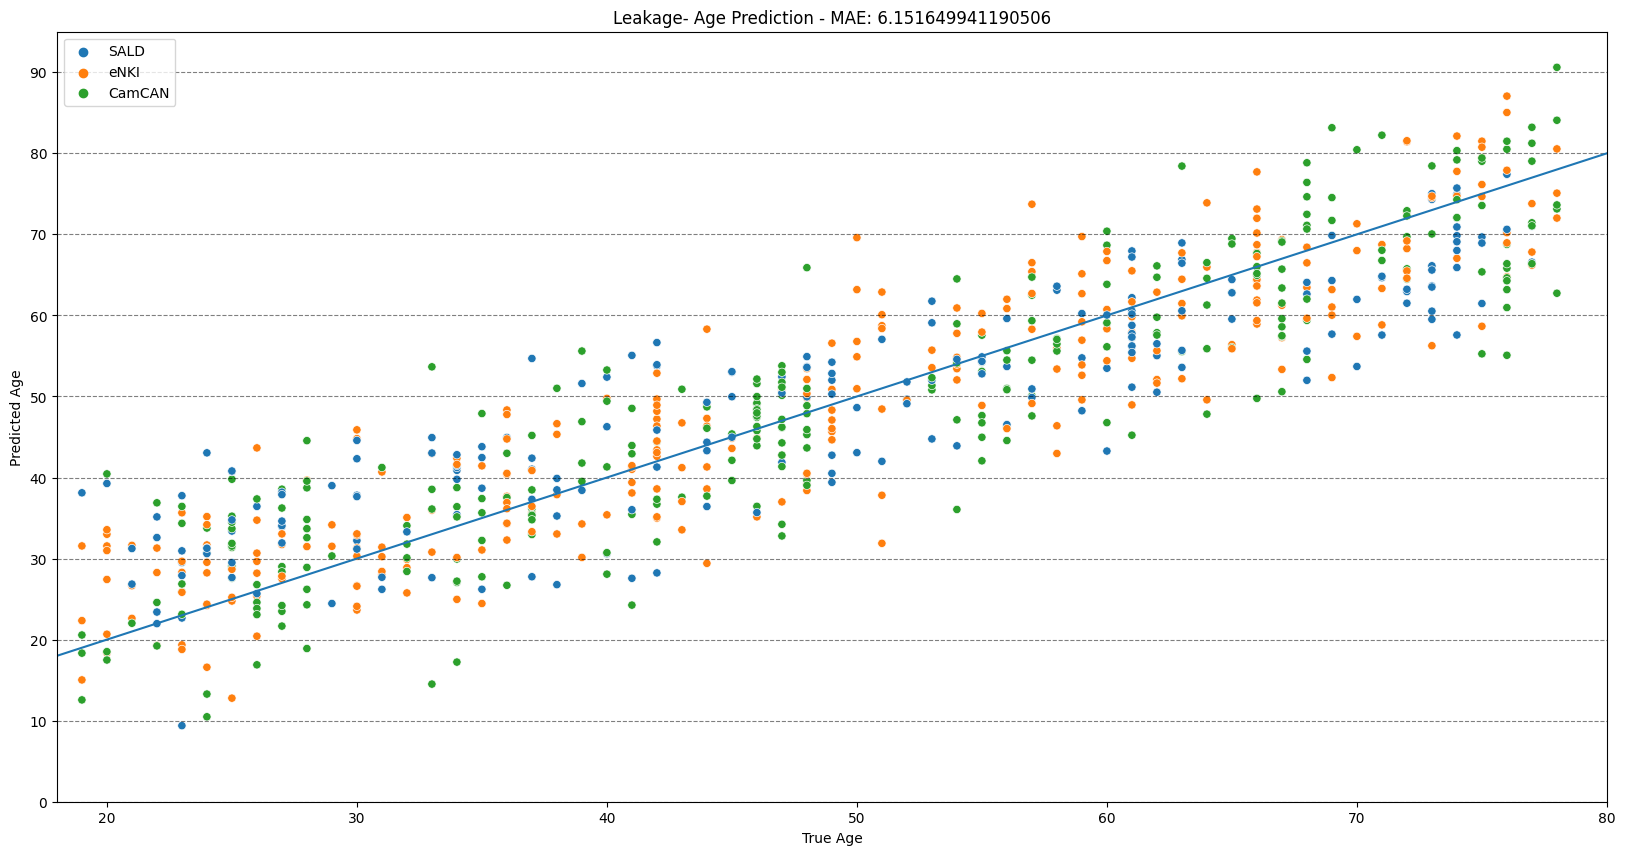

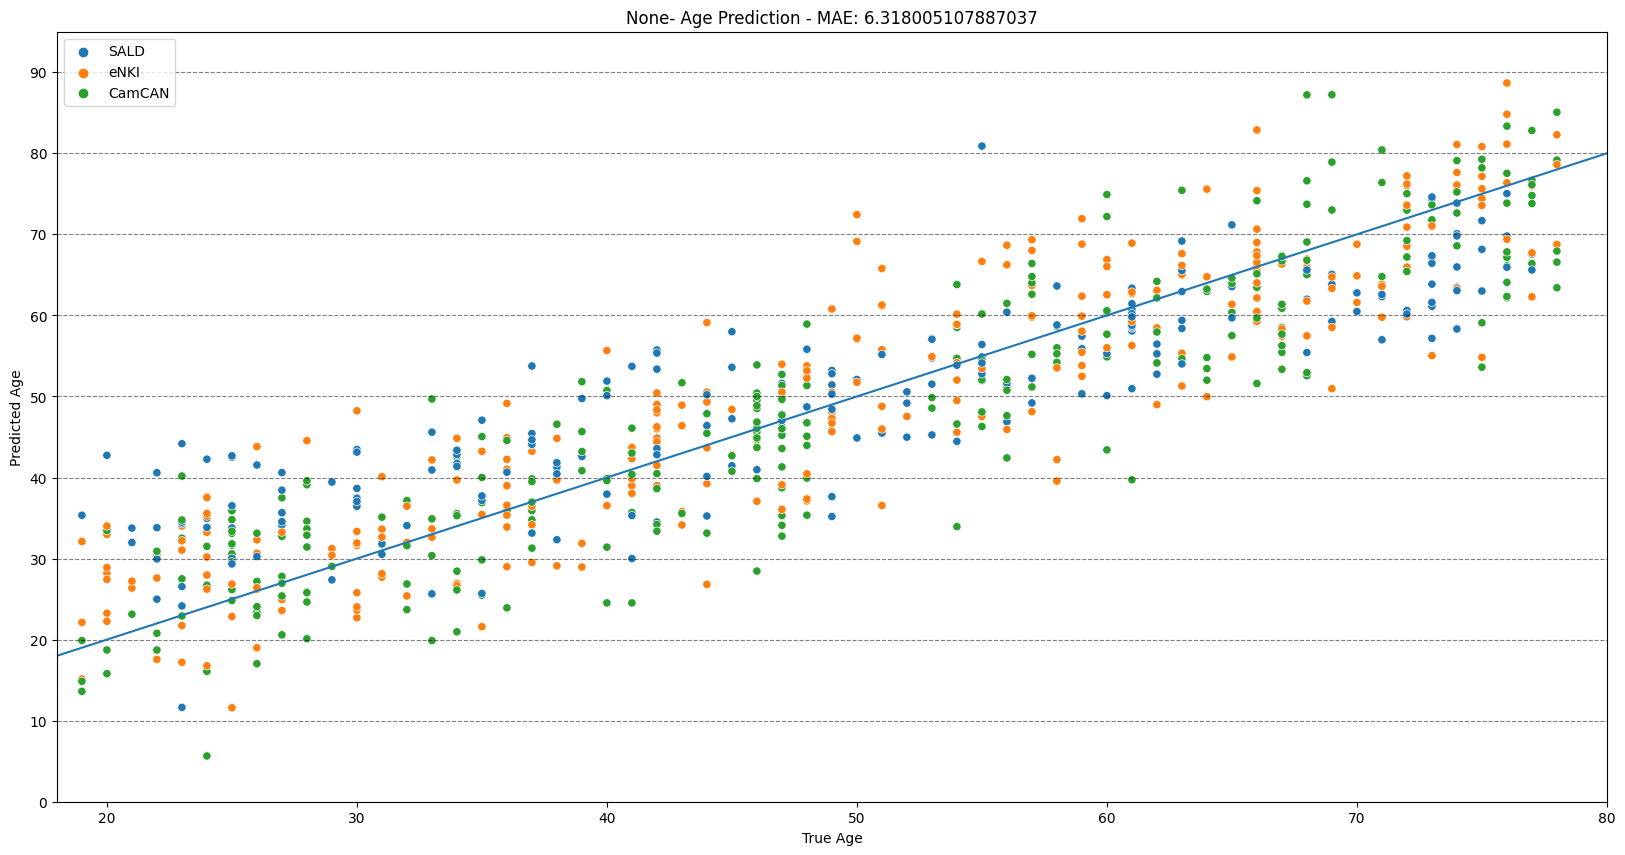

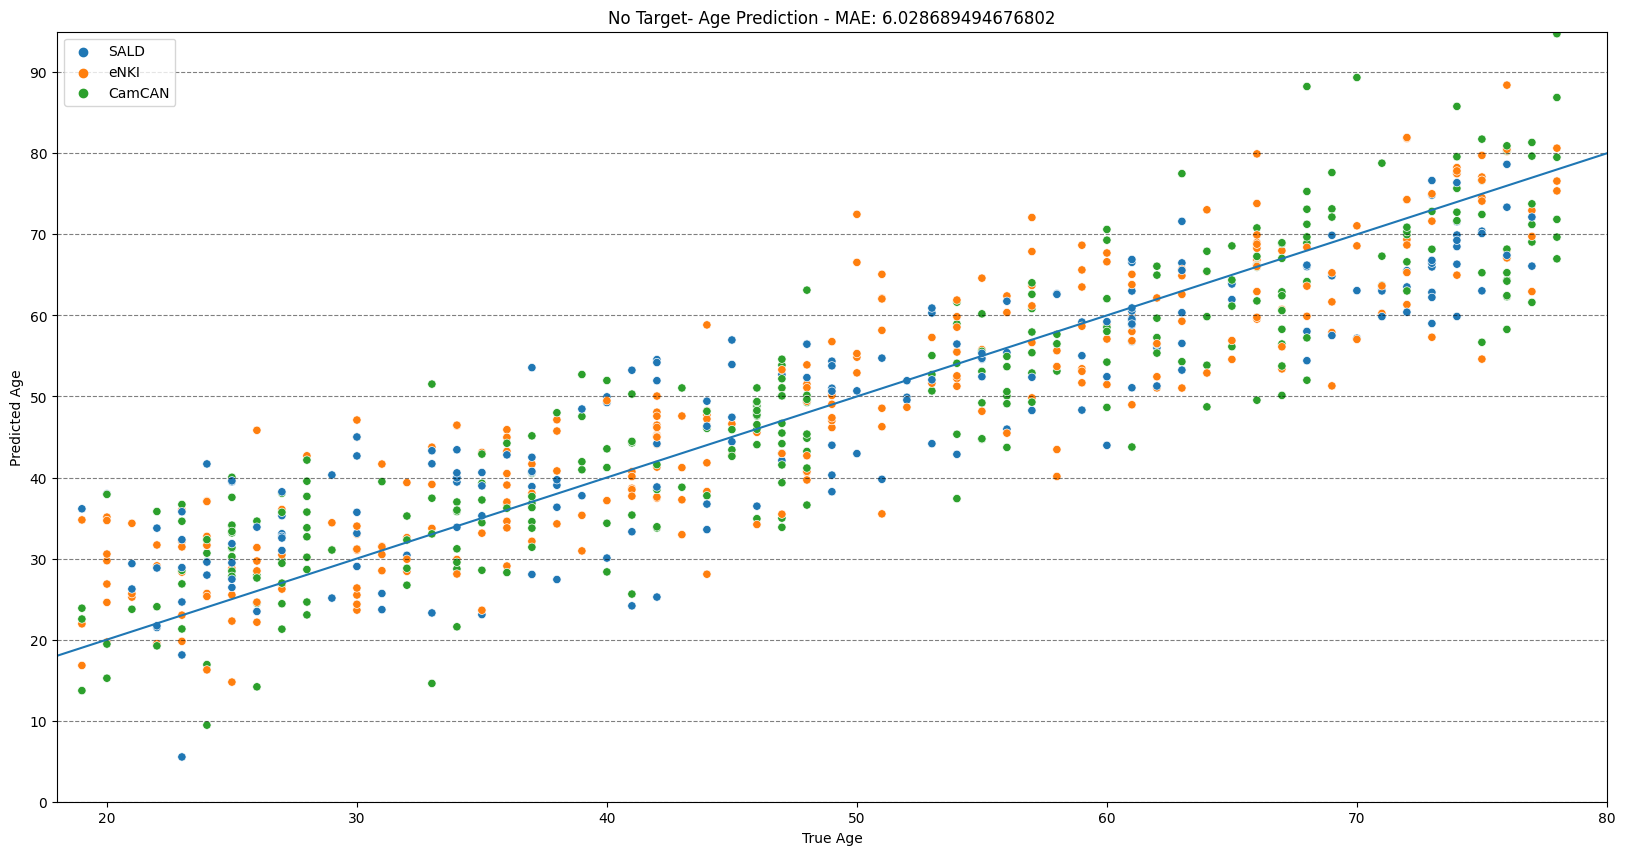

In [42]:

exp_dir = "/home/nnieto/Nico/Harmonization/results_regression/"
experiments_to_check = {
    'test_regression_balanced_data_rvr_stack_rvr_pred'
}
data = extract_experiment_data(exp_dir, experiments_to_check)
data["site"].replace({"1000Gehirne": "1000Brains",
                      "ID1000": "AOMIC-ID1000"}, inplace=True)
data["Harmonization Schemes"].replace({"pretend": "JuHarmonize",
                                "target": "Leakage",
                                "none": "None",
                                "cheat": "Cheat",
                                "predict": "NeuroHarmony",
                                "notarget": "No Target"}, inplace=True)

harm_modes = ["JuHarmonize", "Cheat", "Leakage", "None", "No Target"]

absolute = False

if absolute:
    data["y_diff"] = np.abs(data["y_true"]-data["y_pred"])
else:
    data["y_diff"] = data["y_true"]-data["y_pred"]
hue_order = ['SALD', 'eNKI', 'CamCAN',]
for harm_to_plot in harm_modes:
    data_to_plot = data[data["Harmonization Schemes"] == harm_to_plot]
    fig, ax = plt.subplots(1, 1, figsize=[20, 10])
    pal = sbn.cubehelix_palette(5, rot=-.15, light=0.85, dark=0.3)
    sbn.scatterplot(
        data=data_to_plot,
        x="y_true", y="y_pred", hue="site", hue_order=hue_order
    )
    plt.ylabel("Predicted Age")
    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(data_to_plot["y_true"],data_to_plot["y_pred"])
    plt.title(harm_to_plot + "- Age Prediction - MAE: " + str(MAE))
    plt.xlabel("True Age")
    age_range_y = [0,95]
    grid_distance = 10
    plt.yticks(np.arange(age_range_y[0], age_range_y[1], grid_distance))
    plt.grid(alpha=0.5, which="both", axis="y", c="black", linestyle="--")
    plt.legend([],framealpha=0)
    age_range = [18,80]
    plt.xlim(age_range)

    plt.ylim(age_range_y)
    sbn.lineplot(x=age_range, y=age_range)
    plt.show()



